# Jupyter Notebook Python Regression Model Example

Please Note: All python code in this workbook is taken from the Tutorial Solutions on Linear Regression by Marc Deisenroth from his GitHub page; none of the code is my own, and the equations used are based off of his tutorial linked below

https://colab.research.google.com/github/mml-book/mml-book.github.io/blob/master/tutorials/tutorial_linear_regression.solution.ipynb#scrollTo=yr9AM8lWuYI0

In this notebook we will look at an example piece of code to see how linear regression works in python.

So we will start with a basic linear regression problem as such

$$
y =\boldsymbol\theta_0 + \boldsymbol x^T\boldsymbol\theta_1 
$$

where $\boldsymbol\theta_0$ and $\boldsymbol\theta_1$ are our parameters to optimise, $\boldsymbol x^T$ is our input training data transposed, and y is our output training data. Our input training data is transposed so that we can perform linear algebra calculations with it in python.

So using arrays with some training values for $\boldsymbol x$ and y we can obtain a graph as follows

Here are the librarys we require:

In [63]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

Using arrays with some training values for $\boldsymbol x$ and y we can obtain a graph as follows

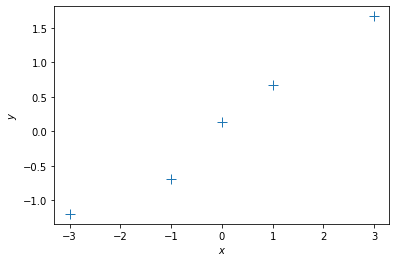

In [64]:
# Define training set
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1) # 5x1 vector

# Plot the training set
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

For Python, we can use a function called the Maximum Likelihood Estimation to calculate an initial value for our parameter $\boldsymbol\theta_0$. This is given the symbol $\boldsymbol\theta^{\mathrm{ML}}$ and is calculated by the following equation

$$
\boldsymbol\theta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y,
$$

where $\boldsymbol X$ is our input training data, and y is our output training data, both given by the vectors

$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T,\quad \boldsymbol y = [y_1, \ldots, y_N]^T .
$$

where N is the number of examples in our dataset.

Using the linear algebra library, we can define a function to calculate this value

In [65]:
## EDIT THIS FUNCTION
def max_lik_estimate(X, y):
    
    theta_ml = np.linalg.solve(X.T @ X, X.T @ y) # the solve function solves a linear algerbra problem; X.T transposes a matrix X; and @ multiplies two matrices by each other
    return theta_ml

In [66]:
# get maximum likelihood estimate
theta_ml = max_lik_estimate(X,y)

We can then make a prediction for our x axis values for our model by creating a function that obtains y values from a test set of x values multiplied by our Maximum Likelihood Estimation (as shown in our original regression equation)

In [67]:
def predict_with_estimate(Xtest, theta):
    
    # Xtest: K x D matrix of test inputs
    # theta: D x 1 vector of parameters
    # returns: prediction of f(Xtest); K x 1 vector
    
    prediction = Xtest @ theta ## <-- SOLUTION
    
    return prediction 

Our test set of x values can be created using the linspace function, that creates an array of values of equally spaced values between two numbers. We can then plot our predicted y values against our test set x values and compare the model with our initial training data.

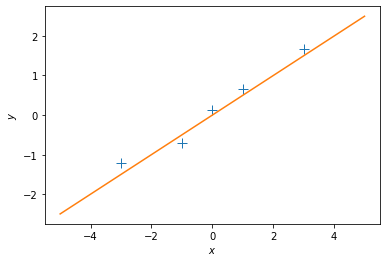

In [68]:
# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 equally spaced values between -5 and 5

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest, theta_ml)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

# Polynomial Regression

Next we will have a look at how polynomial regression would work in python.Again, we will start with our training set and plot it:

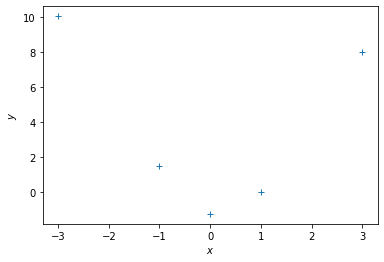

In [69]:
y = np.array([10.05, 1.5, -1.234, 0.02, 8.03]).reshape(-1,1)
plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

We can re write our polynomial regression formula seen in the lectures as 

$$
\sum_{k=0}^K \theta_k x^k = \boldsymbol \phi(x)^T\boldsymbol\theta\,,\quad
\boldsymbol\phi(x)= 
\begin{bmatrix}
x^0\\
x^1\\
\vdots\\
x^K
\end{bmatrix}.
$$

and we can also define a matrix that collects all of our training sets for each x value to use in our Maximum Likelihood Estimation equation:

$$
\boldsymbol\Phi = \begin{bmatrix}
\boldsymbol\phi(x_1) & \boldsymbol\phi(x_2) & \cdots & \boldsymbol\phi(x_n)
\end{bmatrix}^T 
$$

First, we must compute our matrix $\boldsymbol\Phi$

In [70]:
def poly_features(X, K):
    
    # X: inputs of size N x 1
    # K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten() # x.flatten puts all our x values into a 1 dimensional list
    N = X.shape[0] # calculates our number of columns 
    
    Phi = np.zeros((N, K+1)) #creates a zero matrix of size N by K+1
    
    for k in range(K+1):
        Phi[:,k] = X**k #here defines our matrix values
    return Phi

Next we must create a function that calculates our Maximum Likelihood Estimation.Using our Maximum Likelihood Estimator equation, our equation for a polynomial becomes

$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

We also must add a "jitter" value to be able to invert our matrix no matter what values we put into it, making our equation

$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi + k I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

where k is our jitter value, and we multiply this by the identity matrix to turn it into a matrix for our calculations

In [71]:
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1
    
    kappa = 1e-08 # 'jitter' term; good for numerical stability
     
    D = Phi.shape[1] #this returns the dimensions of the matrix Phi  
    
    # maximum likelihood estimate
    Pt = Phi.T @ y # Phi^T*y
    PP = Phi.T @ Phi + kappa*np.eye(D) # Phi^T*Phi + kappa*I
        
    # maximum likelihood estimate
    C = scipy.linalg.cho_factor(PP)
    theta_ml = scipy.linalg.cho_solve(C, Pt) # inv(Phi^T*Phi)*Phi^T*y 
    
    return theta_ml

Now we have everything defined, we can apply this all in the same way we did for our linear function and compare our model to our training data

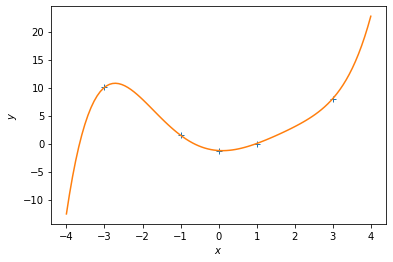

In [72]:
K = 5 # Define the degree of the polynomial we wish to fit
Phi = poly_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
Xtest = np.linspace(-4,4,100).reshape(-1,1)

# feature matrix for test inputs
Phi_test = poly_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");